# Лабораторна робота №1
## Дослідження та візуалізація даних за допомогою Python
<br /><br/>

<b> Виконав<br/>
студент групи КН-221а<br/>
Кукуєв Руслан Олександрович<br/>
Перевірив<br/>
асистент кафедри<br/>
Звєрцев Герман Олександрович</b>


<b>Мета: отримати базові навики використання Python для дослідження та
візуалізації даних</b>.

In [1]:
N = ord("R") % 3 + 1
print(N)

2


### Варіант 2. Дослідження втрат танків

1. **Створення функції для отримання значень стовпця**

   Створіть функцію, яка приймає назву файлу та назву стовпця як параметр і повертає масив numpy зі значеннями стовпця.

2. **Створення масиву зі значень стовпця "tank"**

   Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця "tank".

3. **Знаходження добових втрат танків**

   Обчисліть добові втрати танків.

4. **Знаходження 4 найбільших добових втрат танків**

   Знайдіть чотири найбільших значення добових втрат танків.

5. **Визначення кількості знищених танків навесні 2023 року**

   Визначте, скільки танків було знищено навесні 2023 року.

6. **Знаходження середнього значення знищених танків за останні 100 днів війни**

   Знайдіть середнє значення знищених танків за останні 100 днів війни.

7. **Створення графіку втрат танків за минулий рік**

   Створіть графік втрат танків за останній рік, починаючи з останньої дати в наборі даних.



In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Загальні втрати танків: 4702
4 найбільших добових втрат танків: [35 44 48 66]
Втрати танків навесні 2023 року: 407
Середнє значення втрат танків (100 днів війни): 1376.0


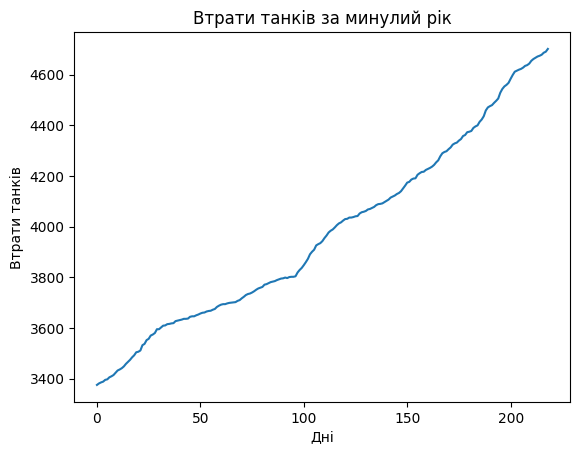

In [18]:
import numpy as np
import csv
import matplotlib.pyplot as plt

def get_column_data(file_name, column_name, data_type=int):
    with open(file_name, newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        data = [row[column_name] for row in reader]
    return np.array(data, dtype=data_type)

file_name = 'russia_losses_equipment.csv'
tank_data = get_column_data(file_name, 'tank')

def get_daily_losses():
    return np.diff(tank_data)

def get_top_4_daily_losses(): 
    return np.sort(get_daily_losses())[-4:]

def get_spring_losses():
    dates_data = get_column_data(file_name, 'date', data_type=str)
    start_date = '2023-03-01'
    end_date = '2023-05-31'
    spring_start_index = np.where(dates_data == start_date)[0][0]
    spring_end_index = np.where(dates_data == end_date)[0][0]
    
    return apc_data[spring_end_index] - apc_data[spring_start_index]

def get_average_losses_100():
    return np.mean(tank_data[99])

def show_last_year_losses():
    last_year_losses = tank_data[365:]
    dates = np.arange(len(last_year_losses))
    total_losses = tank_data[-1]
    
    plt.plot(dates, last_year_losses)
    plt.xlabel('Дні')
    plt.ylabel('Втрати танків')
    plt.title('Втрати танків за минулий рік')
    plt.show()

print("Загальні втрати танків:", total_losses)
print("4 найбільших добових втрат танків:", get_top_4_daily_losses())
print("Втрати танків навесні 2023 року:", get_spring_losses())
print("Середнє значення втрат танків (100 днів війни):", get_average_losses_100())

show_last_year_losses()